#QWE Assignment

**Jiacheng Li**

**Q1. Age and Churn Rate Correlation Analysis（2 Points）**

Is Wall’s belief about the dependence of churn rates on customer age supported by
the data? To get some intuition, try visualizing this dependence (Hint: no need to run
any statistical tests)


In [ ]:
#Import from Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_excel("/content/drive/MyDrive/UV6696-XLS-ENG.xlsx")

In [ ]:
df.head(3)

,ID,Customer Age (in months),"Churn (1 = Yes, 0 = No)",CHI Score Month 0,CHI Score 0-1,Support Cases Month 0,Support Cases 0-1,SP Month 0,SP 0-1,Logins 0-1,Blog Articles 0-1,Views 0-1,Days Since Last Login 0-1
0,1,67,0,0,0,0,0,0.0,0.0,0,0,0,31
1,2,67,0,62,4,0,0,0.0,0.0,0,0,-16,31
2,3,55,0,0,0,0,0,0.0,0.0,0,0,0,31


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6347 entries, 0 to 6346
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          6347 non-null   int64  
 1   Customer Age (in months)    6347 non-null   int64  
 2   Churn (1 = Yes, 0 = No)     6347 non-null   int64  
 3   CHI Score Month 0           6347 non-null   int64  
 4   CHI Score 0-1               6347 non-null   int64  
 5   Support Cases Month 0       6347 non-null   int64  
 6   Support Cases 0-1           6347 non-null   int64  
 7   SP Month 0                  6347 non-null   float64
 8   SP 0-1                      6347 non-null   float64
 9   Logins 0-1                  6347 non-null   int64  
 10  Blog Articles 0-1           6347 non-null   int64  
 11  Views 0-1                   6347 non-null   int64  
 12   Days Since Last Login 0-1  6347 non-null   int64  
dtypes: float64(2), int64(11)
memory u

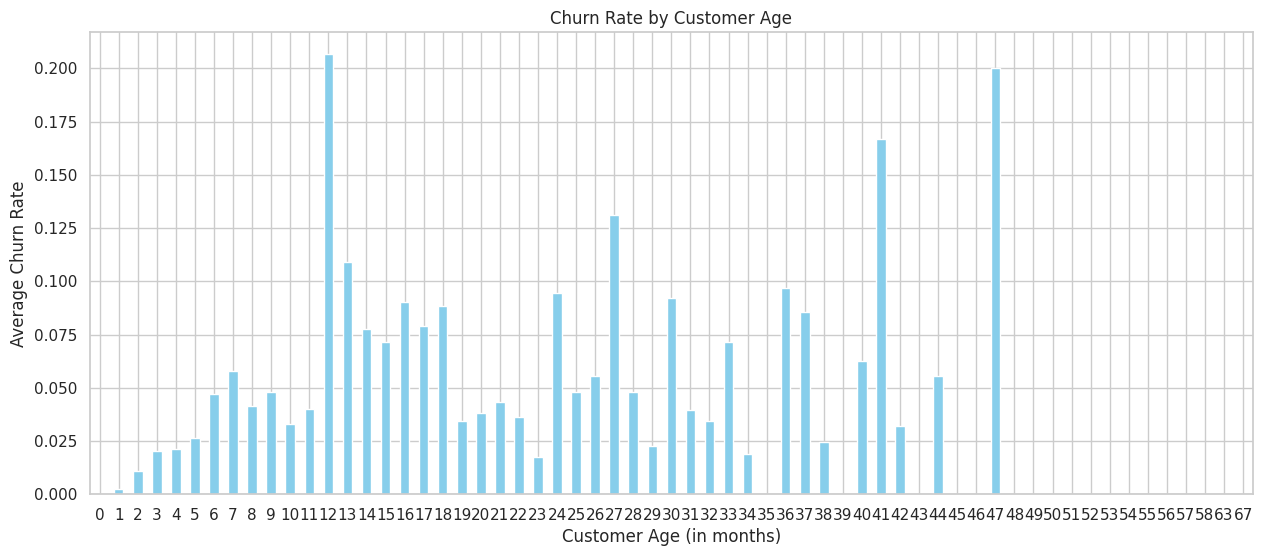

In [ ]:
import matplotlib.pyplot as plt
# Grouping Data
age_churn_rate = df.groupby('Customer Age (in months)')['Churn (1 = Yes, 0 = No)'].mean()

# Creating Bar Chart
plt.figure(figsize=(15, 6))
age_churn_rate.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Customer Age')
plt.xlabel('Customer Age (in months)')
plt.ylabel('Average Churn Rate')
plt.xticks(rotation='horizontal')
plt.show()

**Answer:**

 The diagram reveals that customer age does influence churn rates, as evidenced by varying churn rates across age groups. However, the relationship is not straightforward or linear, suggesting that while age is a factor in churn, it is not the predominant or only determinant. This indicates a more complex interplay of factors influencing customer churn, with age being one of several contributors.

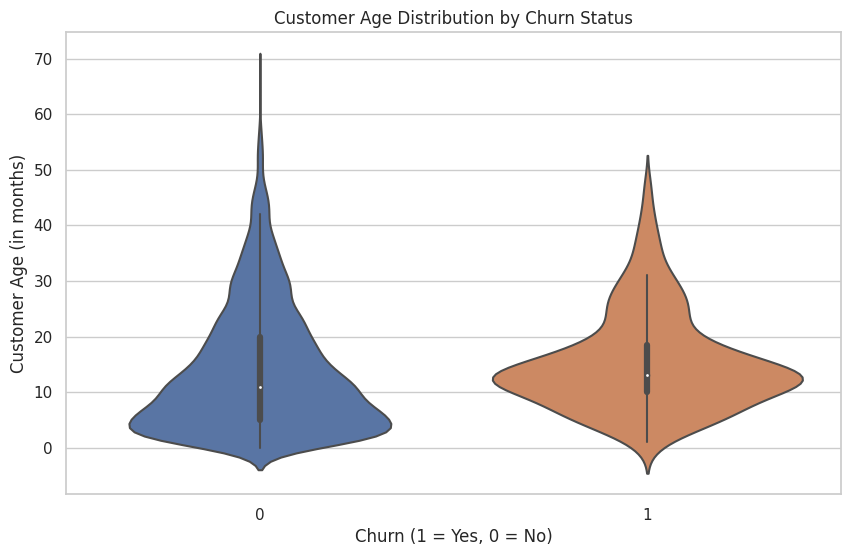

Churn (1 = Yes, 0 = No)
0    13.818725
1    15.352941
Name: Customer Age (in months), dtype: float64

In [ ]:
# Creating Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['Churn (1 = Yes, 0 = No)'], y=df['Customer Age (in months)'])
plt.title('Customer Age Distribution by Churn Status')
plt.xlabel('Churn (1 = Yes, 0 = No)')
plt.ylabel('Customer Age (in months)')
plt.show()

# Calculate the mean age for churned and not churned customers
mean_ages = df.groupby('Churn (1 = Yes, 0 = No)')['Customer Age (in months)'].mean()
mean_ages

**Answer:**

The width of each "violin" indicates the density of data points at different ages. However, there is no stark contrast in the age distribution between the two groups, suggesting that customer age may not be a strongly distinguishing factor in churn.

The mean ages for churned and not churned customers provide further insight:
Non-churned customers (0) have an average age of approximately 13.82 months.
Churned customers (1) have a slightly higher average age of approximately 15.35 months.

These findings suggest that while there might be a slight difference in the average age of churned versus non-churned customers, the difference is not substantial. This implies that Wall's belief about a strong dependence of churn rates on customer age may not be fully supported by the data.

**Q2. Regression Model Implementation (2 Points)**

Run a regression model that best predicts the probability that a customer leaves.
Additionally, address the following:

**A. Customer 672 Probability Analysis**

What is the predicted probability that Customer 672 will leave between December
2011 and February 2012? Is that high or low? Did that customer actually leave

**B. Probability Assessment for Customers 354 and 5203 (1 Point)**

What about Customers 354 and 5203?



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
X = df.drop('Churn (1 = Yes, 0 = No)', axis=1)
y = df['Churn (1 = Yes, 0 = No)']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Building Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Predicting the probability of churn for 672, 354 and 5203
specific_customers = df[df['ID'].isin([672, 354, 5203])]
probabilities = log_reg.predict_proba(specific_customers.drop('Churn (1 = Yes, 0 = No)', axis=1))

# Extracting and Checking
specific_customer_probs = probabilities[:, 1] # Index 1 is for churn
actual_churn_status = specific_customers['Churn (1 = Yes, 0 = No)']

# Output
accuracy, specific_customer_probs, actual_churn_status

(0.9459317585301837,
 array([0.08805344, 0.0571815 , 0.03072087]),
 353     0
 671     0
 5202    0
 Name: Churn (1 = Yes, 0 = No), dtype: int64)

**Anwer A for Customer 672:**

The logistic regression model predicts an 8.81% probability of churn for Customer 672. This prediction indicates that it is low probability for customer 672 to leave during that period. In reality, Customer 672 **did not leave.**

**Anwer B for Customer 354 and 5203:**

For Customer 354, the model estimates a churn probability of approximately 5.72%. This value indicates a low risk of churn. The actual data also shows that Customer 354 **did not leave.**


For Customer 5203 stands at a relatively low 3.07% probability of churn, the lowest among the three customers. This low probability suggests a minimal risk of this customer leaving the company. The actual data also confirms that Customer 5203 **did not leave.**


**Q3. Key Contributing Factors (2 Points)**

What factors contribute the most to the predicted probabilities that these customers will leave?


In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
#Creating Predictors related to selected columns
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
predictors = [col for col in numeric_columns if col != 'Churn (1 = Yes, 0 = No)' and col != 'ID']

X = df[predictors]
y = df['Churn (1 = Yes, 0 = No)']

# Fit the Model
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

# Computing
perm_importance = permutation_importance(model, X, y, n_repeats=30, random_state=42)

# Extracting
feature_importance = pd.DataFrame(data={
    'Feature': predictors,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

feature_importance

,Feature,Importance
4,Support Cases 0-1,0.000179
9,Views 0-1,0.000158
1,CHI Score Month 0,0.000053
3,Support Cases Month 0,0.000021
2,CHI Score 0-1,0.000011
10,Days Since Last Login 0-1,0.000005
0,Customer Age (in months),0.000000
5,SP Month 0,0.000000
6,SP 0-1,0.000000
7,Logins 0-1,0.000000


**Answer：**

The feature "Support Cases 0-1" emerges as the most influential in predicting customer churn, with an importance score of 0.000179. This suggests that changes in the number of support cases over time are a critical indicator of churn risk. Following closely is "Views 0-1" with an importance score of 0.000158, indicating that variations in the number of views are also a significant predictor of churn, likely reflecting changes in customer engagement or satisfaction. The "CHI Score Month 0" and "Support Cases Month 0" are also notable predictors, albeit with lower importance scores of 0.000053 and 0.000021, respectively, suggesting that initial customer interactions and support needs are key indicators. Other factors like changes in CHI score, days since last login, and customer age show minimal to no impact on churn prediction in this model.

**Q4. Addressing Wall’s Ultimate Question (2 Points)**

Answer Wall’s “ultimate question”: provide the list of 100 customers with the highest churn probabilities and the top three drivers of churn for each customer.


In [ ]:
# Defining
X = df[predictors]
y = df['Churn (1 = Yes, 0 = No)']

# Fit the Model
model.fit(X, y)

# Probabilities
predicted_probabilities = model.predict_proba(X)[:, 1]
df['Predicted Churn Probability'] = predicted_probabilities

# Sort in descending order and Select top 100
sorted_customers = df.sort_values(by='Predicted Churn Probability', ascending=False)
top_100_customers = sorted_customers.head(100)

# Coefficients of Logistic Regression Model
model_coefficients = pd.DataFrame(data={
    'Feature': predictors,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

# Top three drivers
top_3_drivers = model_coefficients.head(3)['Feature'].tolist()
top_100_customers[['ID', 'Predicted Churn Probability']], top_3_drivers

(        ID  Predicted Churn Probability
 2286  2287                     0.400012
 356    357                     0.344052
 108    109                     0.301802
 1970  1971                     0.248066
 2075  2076                     0.216965
 ...    ...                          ...
 2655  2656                     0.138880
 1907  1908                     0.138010
 2912  2913                     0.137628
 2285  2286                     0.137055
 11      12                     0.136783
 
 [100 rows x 2 columns],
 ['Support Cases 0-1',
  ' Days Since Last Login 0-1',
  'Customer Age (in months)'])

In [ ]:
excel_path = '/content/top_100_customers.xlsx'

# Export to Excel
top_100_customers.to_excel(excel_path, index=False)



**Answer:**

Based on the data above, the customer at the top of this list is ID 2287, with a predicted probability of approximately 40.00% of leaving the company.

Top three drivers:

1. Support Cases 0-1: Changes in the number of support cases over time are the most significant factor. This suggests that varying levels of customer service needs or satisfaction are critical in influencing a customer's likelihood of churning.

2. Days Since Last Login 0-1: The duration since a customer last logged in is another crucial factor. A longer period without customer engagement could indicate waning interest or satisfaction, thus increasing the risk of churn.

3. Customer Age (in months): The customer's tenure with the company, represented by their age in months, is also a key driver. This implies that both newer and longer-term customers have specific churn risks, possibly for different reasons.